In [81]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import confusion_matrix, classification_report, roc_auc, class_prediction_error, discrimination_threshold
import warnings
warnings.filterwarnings('ignore')

# Importa base

In [14]:
data = load_breast_cancer(as_frame=True)['frame']

In [15]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [34]:
data.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

# EDA

In [18]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
data.target.value_counts()

1    357
0    212
Name: target, dtype: int64

# Separa base de treino e base de teste
* Por que separar?
* Por que embaralhar a base antes de separar?

In [35]:
#Primeiro embaralhamos a base (por quê?)
data = data.sample(frac=1)

In [21]:
X = data.iloc[:,:-1]
y = data['target']

In [25]:
Xtrn, Xtst, ytrn, ytst = train_test_split(X, y, test_size=0.33, random_state=123)

# Processamento dos dados e _feature engineering_

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
Xtrn = scaler.fit_transform(Xtrn)
Xtst = scaler.transform(Xtst)

Desafio: Por que dar fit na base treino apenas, e não na base inteira? 

# Cria modelos - 1 (sem cross-validation)

In [57]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [58]:
modelos = {'dummy': DummyClassifier(),
           'logistic': LogisticRegression(),
           'KNN': KNeighborsClassifier(),
           'tree': DecisionTreeClassifier(),
           'rf': RandomForestClassifier(),
           'nn': MLPClassifier(max_iter=500)}
,
resultados = pd.DataFrame([], index = modelos.keys(), columns=['precision','recall','f1','accuracy'])
resultados

,precision,recall,f1,accuracy
dummy,NaN,NaN,NaN,NaN
logistic,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN
tree,NaN,NaN,NaN,NaN
rf,NaN,NaN,NaN,NaN
nn,NaN,NaN,NaN,NaN


In [62]:
for nome, modelo in modelos.items():
    modelo.fit(Xtrn,ytrn)
    ypred = modelo.predict(Xtst)
    
    precision = precision_score(ytst, ypred)
    recall = recall_score(ytst, ypred)
    f1 = f1_score(ytst, ypred)
    accuracy = accuracy_score(ytst, ypred)
    
    resultados.loc[nome,:] = precision, recall, f1, accuracy
    modelos[nome] = modelo

resultados    

,precision,recall,f1,accuracy
dummy,0.672269,0.620155,0.645161,0.531915
logistic,0.976923,0.984496,0.980695,0.973404
KNN,0.977099,0.992248,0.984615,0.978723
tree,0.98374,0.937984,0.960317,0.946809
rf,0.984252,0.968992,0.976562,0.968085
nn,0.955556,1.0,0.977273,0.968085


Vamos supor que nossa métrica mais importante é _accuracy_:

In [63]:
resultados.sort_values('accuracy',ascending=False)

,precision,recall,f1,accuracy
KNN,0.977099,0.992248,0.984615,0.978723
logistic,0.976923,0.984496,0.980695,0.973404
rf,0.984252,0.968992,0.976562,0.968085
nn,0.955556,1.0,0.977273,0.968085
tree,0.98374,0.937984,0.960317,0.946809
dummy,0.672269,0.620155,0.645161,0.531915


# Cria modelos - 2 (com cross-validation)

In [109]:
from sklearn.model_selection import cross_validate

In [120]:
#Qual o output do cross-validation?
cross_validate(modelo, Xtrn, ytrn, scoring = ['precision','recall','f1','accuracy'])

{'fit_time': array([1.28095102, 1.23074174, 1.40679741, 1.23733068, 1.41378212]),
 'score_time': array([0.00905895, 0.00979733, 0.00399446, 0.00561047, 0.00762177]),
 'test_precision': array([1.        , 0.95744681, 0.9787234 , 0.97826087, 0.97826087]),
 'test_recall': array([1.        , 0.97826087, 1.        , 1.        , 1.        ]),
 'test_f1': array([1.        , 0.96774194, 0.98924731, 0.98901099, 0.98901099]),
 'test_accuracy': array([1.        , 0.96052632, 0.98684211, 0.98684211, 0.98684211])}

In [113]:
#Quais as métricas de avaliação possíveis?
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [121]:
#Comparação de modelos usando cross-validation
modelos = {'dummy': DummyClassifier(),
           'logistic': LogisticRegression(),
           'KNN': KNeighborsClassifier(),
           'tree': DecisionTreeClassifier(),
           'rf': RandomForestClassifier(),
           'nn': MLPClassifier(max_iter=500)}
,
resultados = pd.DataFrame([], index = modelos.keys(), columns=['precision','recall','f1','accuracy'])

In [122]:
for nome, modelo in modelos.items():
    modelo.fit(Xtrn,ytrn)
    ypred = modelo.predict(Xtst)
    
    cv = cross_validate(modelo, Xtrn, ytrn, scoring = ['precision','recall','f1','accuracy'])
    
    precision = cv['test_precision'].mean()
    recall = cv['test_recall'].mean()
    f1 = cv['test_f1'].mean()
    accuracy = cv['test_accuracy'].mean()
    
    resultados.loc[nome,:] = precision, recall, f1, accuracy
    modelos[nome] = modelo

resultados.sort_values('accuracy',ascending=False)

,precision,recall,f1,accuracy
nn,0.982605,0.991304,0.98686,0.984211
logistic,0.974186,0.991208,0.982605,0.978982
KNN,0.953604,0.982415,0.967684,0.960629
rf,0.952827,0.956329,0.954111,0.944805
tree,0.963611,0.921546,0.940282,0.931579
dummy,0.608699,0.570145,0.588154,0.524983


# Investigando um modelo mais a fundo...

In [123]:
modelo = modelos['KNN']

In [124]:
previsao = modelo.predict(Xtrn)
previsao

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,

In [125]:
modelo.predict_proba(Xtrn)[:10,:]

array([[0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0. , 1. ],
       [0.6, 0.4]])

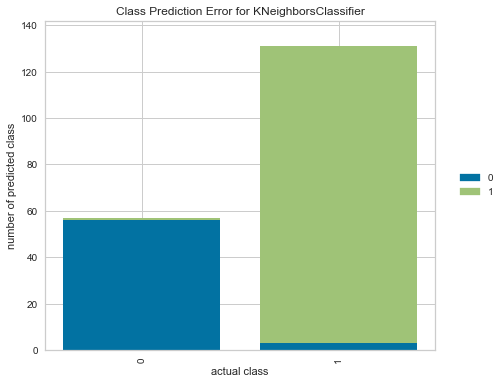

In [126]:
class_prediction_error(modelo, Xtrn, ytrn, Xtst, ytst);

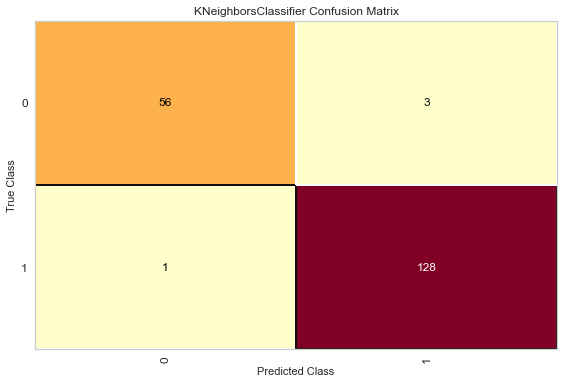

In [127]:
confusion_matrix(modelo, Xtrn, ytrn, Xtst, ytst);

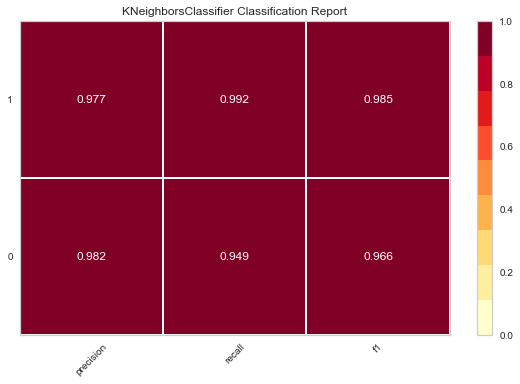

In [128]:
classification_report(modelo, Xtrn, ytrn, Xtst, ytst);

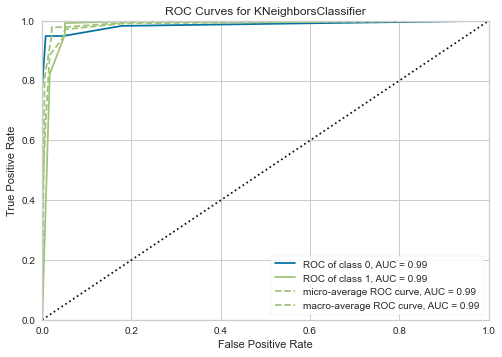

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       binary=None, estimator=KNeighborsClassifier())

In [129]:
roc_auc(modelo, Xtrn, ytrn, Xtst, ytst)

# Hyperparameter tuning

* O que são hiperparâmetros
* Por que otimizar hiperparâmetros?
* Técnicas:
    * Grid search
    * Random search
    * Otimização Bayesiana

Aqui vamos fazer a mais simples: Grid Search.

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
grid = {'n_neighbors': [1, 5, 10, 50], 
        'weights': ['uniform','distance'], 
        'p':[1,2]}

gscv = GridSearchCV(KNeighborsClassifier(), grid, scoring='accuracy', cv=5).fit(Xtrn, ytrn)

gscv.cv_results_

{'mean_fit_time': array([0.00248747, 0.00240831, 0.00202718, 0.00231009, 0.00199499,
        0.00136743, 0.00336957, 0.00219412, 0.00172634, 0.00147729,
        0.00182323, 0.001368  , 0.00218573, 0.0039412 , 0.00362592,
        0.00401359]),
 'std_fit_time': array([0.00106496, 0.00094537, 0.00114276, 0.00124782, 0.00089159,
        0.00054398, 0.00325994, 0.00039866, 0.00082837, 0.00044755,
        0.00041702, 0.00035786, 0.00201537, 0.00109361, 0.00093653,
        0.00205373]),
 'mean_score_time': array([0.00828848, 0.00309658, 0.00545158, 0.00353141, 0.00634441,
        0.00314093, 0.01625404, 0.00323787, 0.00668726, 0.00299835,
        0.00645752, 0.0032764 , 0.00994701, 0.00713258, 0.0151814 ,
        0.00900245]),
 'std_score_time': array([2.72295491e-03, 1.11467577e-03, 9.69559650e-04, 1.28872674e-03,
        2.46983028e-03, 1.59167462e-03, 1.26479908e-02, 3.86417035e-04,
        8.10359051e-04, 9.18375245e-05, 1.28388529e-03, 3.95774996e-04,
        1.85048908e-03, 6.37045617e-

In [137]:
#Mais fácil visualizar como um dataframe
pd.DataFrame(gscv.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.002027,0.001143,0.005452,0.000970,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.948052,0.960526,0.934211,0.986842,0.973684,0.960663,0.018513,1
3,0.002310,0.001248,0.003531,0.001289,1,2,distance,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",0.948052,0.960526,0.934211,0.986842,0.973684,0.960663,0.018513,1
6,0.003370,0.003260,0.016254,0.012648,5,2,uniform,"{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}",0.961039,0.947368,0.960526,0.973684,0.960526,0.960629,0.008324,3
7,0.002194,0.000399,0.003238,0.000386,5,2,distance,"{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}",0.961039,0.947368,0.960526,0.973684,0.960526,0.960629,0.008324,3
11,0.001368,0.000358,0.003276,0.000396,10,2,distance,"{'n_neighbors': 10, 'p': 2, 'weights': 'distance'}",0.961039,0.934211,0.960526,0.960526,0.973684,0.957997,0.012915,5
4,0.001995,0.000892,0.006344,0.002470,5,1,uniform,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}",0.974026,0.934211,0.934211,0.973684,0.960526,0.955332,0.017919,6
5,0.001367,0.000544,0.003141,0.001592,5,1,distance,"{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",0.974026,0.934211,0.934211,0.973684,0.960526,0.955332,0.017919,6
8,0.001726,0.000828,0.006687,0.000810,10,1,uniform,"{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",0.974026,0.934211,0.921053,0.973684,0.960526,0.952700,0.021447,8
10,0.001823,0.000417,0.006458,0.001284,10,2,uniform,"{'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}",0.974026,0.921053,0.947368,0.960526,0.960526,0.952700,0.017929,8
9,0.001477,0.000448,0.002998,0.000092,10,1,distance,"{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}",0.961039,0.921053,0.934211,0.973684,0.960526,0.950103,0.019395,10


In [138]:
gscv.best_params_

{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}

In [139]:
gscv.best_score_

0.960663021189337

In [140]:
gscv.best_estimator_

KNeighborsClassifier(n_neighbors=1)